# Code for section 2.1 Risk and return trade-off

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import fortitudo.tech as ft
import matplotlib.pyplot as plt

# Download data and preprocess data

In [2]:
tickers = [
    'XLB', 'XLE', 'XLF', 'XLI', 'XLK',
    'XLP', 'XLU', 'XLV', 'XLY', '^GSPC',
    '^IRX', '^TNX', '^TYX', '^VIX']
data = yf.download(tickers, start='1998-12-22', end='2024-10-12')['Adj Close']

names_dict = {
    'XLB': 'Materials', 'XLE': 'Energy', 'XLF': 'Financial', 'XLI': 'Industrial',
    'XLK': 'Technology', 'XLP': 'Consumer Staples', 'XLU': 'Utilities',
    'XLV': 'Health Care', 'XLY': 'Consumer Discretionary',
    '^GSPC': 'S&P 500', '^IRX': '13w yield', '^TNX': '2y yield',
    '^TYX': '30y yield', '^VIX': 'VIX'}
data = data.rename(columns=names_dict)

print(f'The number of daily observations is {len(data)}.')
data.to_csv('market_data.csv')

[*********************100%%**********************]  14 of 14 completed

The number of daily observations is 6493.


# Compute historical statistics

In [3]:
equity_returns = np.diff(data.iloc[:, 0:10], axis=0) / data.iloc[0:-1, 0:10]
equity_returns_df = pd.DataFrame(equity_returns, columns=data.columns[0:10])
equity_stats = ft.simulation_moments(equity_returns_df)

# Add 90%-CVaR
cvars = ft.portfolio_cvar(
    np.eye(len(equity_returns_df.columns)), equity_returns_df, alpha=0.9)
equity_stats['90%-CVaR'] = cvars[0, :]

# Print
display(equity_stats)

,Mean,Volatility,Skewness,Kurtosis,90%-CVaR
Ticker,,,,,
Materials,0.000436,0.015020,-0.019688,9.469339,0.027348
Energy,0.000481,0.018206,-0.247115,13.884937,0.032647
Financial,0.000381,0.018168,0.313331,17.525548,0.031628
Industrial,0.000435,0.013383,-0.163457,10.649374,0.024772
Technology,0.000481,0.016333,0.272813,10.138510,0.030365
Consumer Staples,0.000312,0.009642,-0.096675,10.945266,0.017563
Utilities,0.000363,0.012241,0.207072,14.820929,0.022252
Health Care,0.000401,0.011300,-0.021393,12.033221,0.020619
Consumer Discretionary,0.000462,0.014280,-0.226209,8.958220,0.026438


# Create plot (Figure 2.1.1)

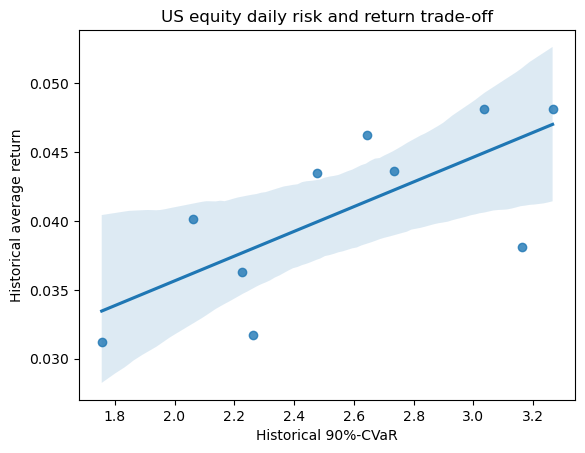

In [4]:
sns.regplot(x=100 * equity_stats['90%-CVaR'], y=100 * equity_stats['Mean'])
plt.title('US equity daily risk and return trade-off')
plt.ylabel('Historical average return')
plt.xlabel('Historical 90%-CVaR')
plt.show()

# Skewness and kurtosis plots

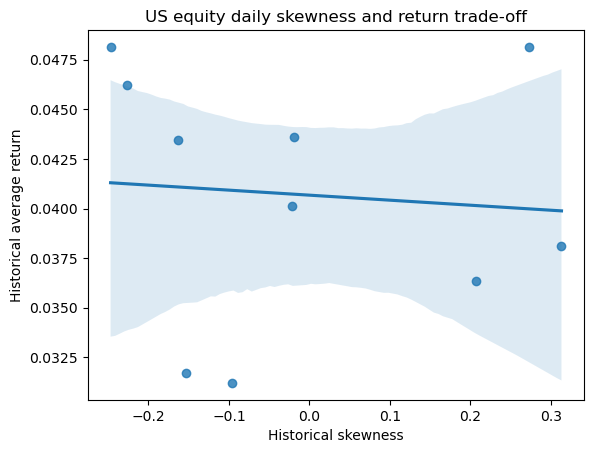

In [5]:
sns.regplot(x=equity_stats['Skewness'], y=100 * equity_stats['Mean'])
plt.title('US equity daily skewness and return trade-off')
plt.ylabel('Historical average return')
plt.xlabel('Historical skewness')
plt.show()

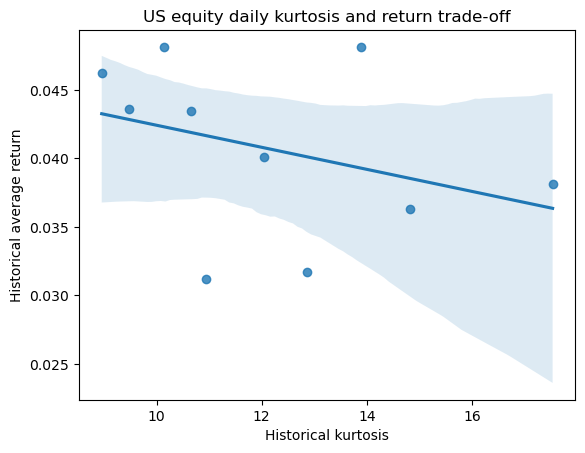

In [6]:
sns.regplot(x=equity_stats['Kurtosis'], y=100 * equity_stats['Mean'])
plt.title('US equity daily kurtosis and return trade-off')
plt.ylabel('Historical average return')
plt.xlabel('Historical kurtosis')
plt.show()